## Introduction

In this notebook, we will demonstrate how financial data can be analysed graphically via some convenient Python functions to uncover their stylised facts.

## Downloading the financial data

There are different options to obtain financial data. One possibility is to use the "yahoo_fin" package which you might have already encountered in another module.

(**Warning**: This package is not an official toolkit developed by Yahoo. It means this package might suddenly stop working if there are any changes with the API of Yahoo!Finance.....)

In [1]:
# Install the yahoo_fin package if needed
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=ddc152521253b51bce82cea991e1f21629e70b9d5a9f1c8039badf5ed4c75de0
  Stored in directory: /Users/akiraalexanderwan/Library/Caches/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=4919ccedb0da209496bf2f0bb3e1cb20e098436f756159bd976c40bc26f6f2d2
  Stored in directory: /Users/akiraalexanderwan/Library/Caches/pip/wheels/65/7a/a7/78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built bs4 sgmllib3k
  Attempting uninstall: cssselect
    Found existing installation: cssselect 1.1.0
    Uninstalling cssselect-1.1.0:
      Successfully uninstalled cssselect-1

In [2]:
#import a few important packages
import yahoo_fin.stock_info as yf
import numpy as np
import matplotlib.pyplot as plt

# Style of plotting - not important here
plt.style.use('ggplot')

# Download the data of S&P500 (which Yahoo ticker is "^GSPC")
# Specify the data range in American format
sp500 = yf.get_data("^gspc", start_date = "09/21/1988", end_date = "08/09/2019")

The function "yf.get_data()" returns a pandas table containing various information. Let's take a look at the first few rows.

In [3]:
sp500.head()

,open,high,low,close,adjclose,volume,ticker
1988-09-21,269.760010,270.640015,269.480011,270.160004,270.160004,127400000,^GSPC
1988-09-22,270.190002,270.579987,268.260010,269.179993,269.179993,150670000,^GSPC
1988-09-23,269.160004,270.309998,268.279999,269.760010,269.760010,145100000,^GSPC
1988-09-26,269.769989,269.799988,268.609985,268.880005,268.880005,116420000,^GSPC
1988-09-27,268.890015,269.359985,268.010010,268.260010,268.260010,113010000,^GSPC


In [4]:
sp500["adjclose"]

1988-09-21     270.160004
1988-09-22     269.179993
1988-09-23     269.760010
1988-09-26     268.880005
1988-09-27     268.260010
                 ...     
2019-08-02    2932.050049
2019-08-05    2844.739990
2019-08-06    2881.770020
2019-08-07    2883.979980
2019-08-08    2938.090088
Name: adjclose, Length: 7782, dtype: float64

In [5]:
sp500.loc["1988-09-23"]

open        269.160004
high        270.309998
low         268.279999
close        269.76001
adjclose     269.76001
volume       145100000
ticker           ^GSPC
Name: 1988-09-23 00:00:00, dtype: object

## Computing the daily returns

The column "adjclose" contains the time series of asset price $S_t$ that we want to work with. The difference between "close" and "adjclose" is that the latter has been properly adjusted for dividends payout.

Let's create a column of daily simple return and a column of daily log return. Simple return is given by $$R_t:=\frac{S_t-S_{t-1}}{S_{t-1}},$$ which can be computed by the panda function "pct_change()". The log return is given by $$r_t:=\ln S_t - \ln S_{t-1}=\ln(1+R_t).$$

We store the values in two new pandas columns called "simplereturn" and "logreturn". We also multiply the two columns by 100 so the values are now in percentage terms.

In [6]:
sp500['simplereturn'] = sp500['adjclose'].pct_change()
sp500['logreturn'] = np.log(1 + sp500['simplereturn'])

# Multiply the return values by 100 so they represent percentage values
sp500['simplereturn']  = sp500['simplereturn']  * 100
sp500['logreturn'] = sp500['logreturn'] * 100

sp500.head()

,open,high,low,close,adjclose,volume,ticker,simplereturn,logreturn
1988-09-21,269.760010,270.640015,269.480011,270.160004,270.160004,127400000,^GSPC,NaN,NaN
1988-09-22,270.190002,270.579987,268.260010,269.179993,269.179993,150670000,^GSPC,-0.362752,-0.363412
1988-09-23,269.160004,270.309998,268.279999,269.760010,269.760010,145100000,^GSPC,0.215476,0.215244
1988-09-26,269.769989,269.799988,268.609985,268.880005,268.880005,116420000,^GSPC,-0.326218,-0.326751
1988-09-27,268.890015,269.359985,268.010010,268.260010,268.260010,113010000,^GSPC,-0.230584,-0.230851


We can visualise the asset prices and the daily returns (from now on, we will just focus on log returns).

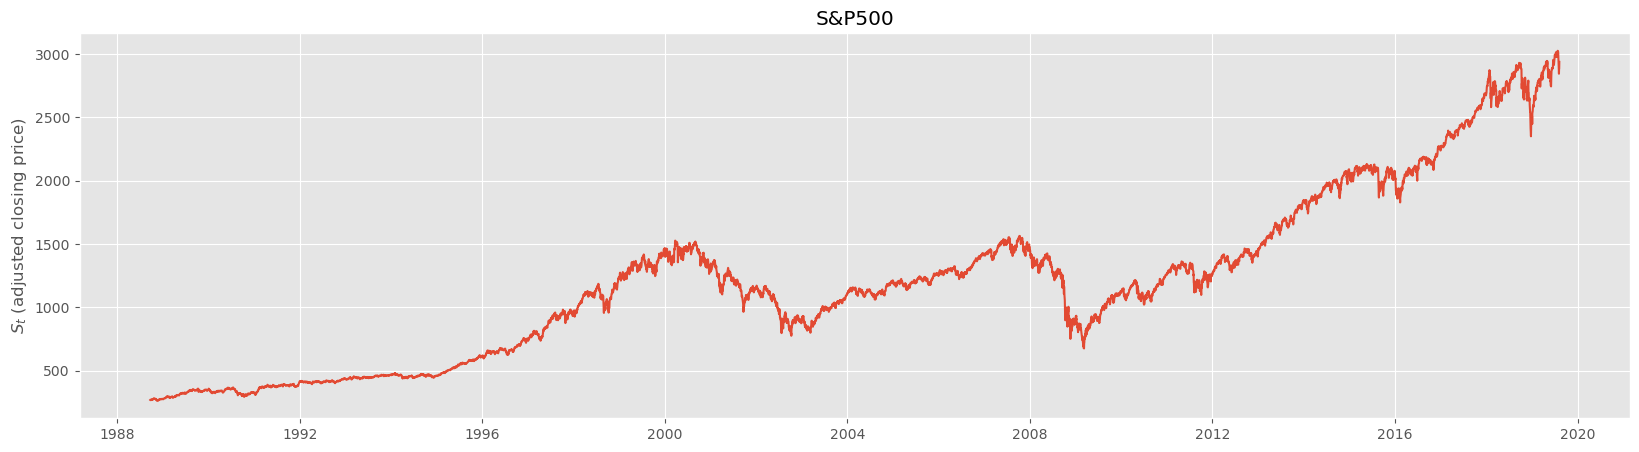

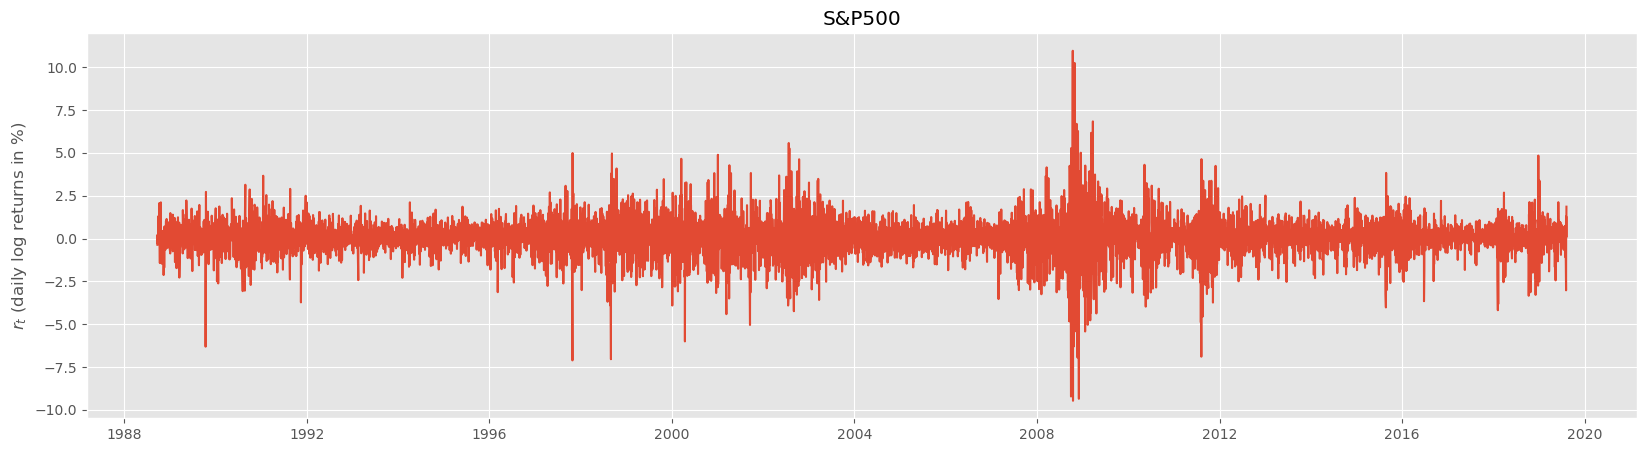

In [7]:
plt.figure(figsize=(20,5))
plt.plot(sp500['adjclose'])
plt.ylabel(r"$S_t$ (adjusted closing price)")
plt.gcf().set_facecolor("white")
plt.title(r"S&P500")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(sp500['logreturn'])
plt.ylabel(r"$r_t$ (daily log returns in %)")
plt.gcf().set_facecolor("white")
plt.title(r"S&P500")
plt.show()

## Alternative plotting

The package "matplotlib" has been the standard python plotting package for many years, but recently "plotly" has gained much popularity for its ease of use and visual quality. It is already pre-installed in Google Colab.

Plotly works great as an interactive plotting tool, supporting zooming and other operations directly inside a jupyter notebook/google colab.

In [8]:
import plotly.express as px

fig = px.line(sp500, x= sp500.index, y=["low", "high"])
fig.show()

## Histogram and kernel density estimator

There are a lot of Python packages that can generate a histogram. Some examples:

1.   Matplotlib (https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)
2.   Plotly (https://plotly.com/python/plotly-express/)
3.   Pandas (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)
4.   Seaborn (https://seaborn.pydata.org/generated/seaborn.histplot.html)


I personally recommend seaborn which specialises in data visualisation tools.


It is useful to supply the number of bins you want to use. There is also an option called "stat" which controls what quantities are displayed in the y-axis.

1.   stat="count": the number of observations in each bin (bar heights sum to total number of data).
2.   stat="proportion": the proportion of observations in each bin (bar heights sum to 1. Consistent with the definition on Slide 11, Part 1 of lecture notes).
3.   stat="density": the scaled proportion of observations in each bin such that the total area of the histogram equals 1. Useful when one wants to compare the data against a reference probability density function.



<AxesSubplot:xlabel='logreturn', ylabel='Proportion'>

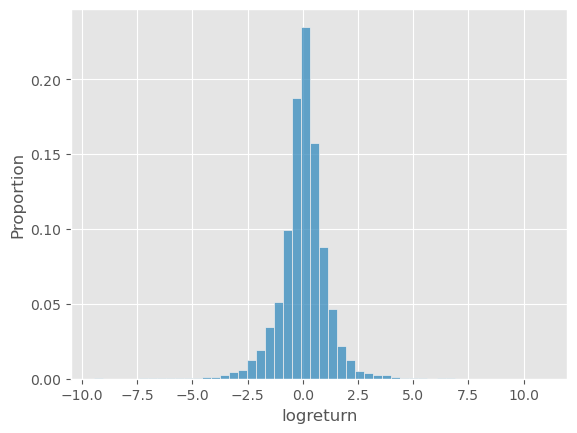

In [9]:
import seaborn as sns     # import the seaborn package

# The below shows the histogram of the daily return, as per slide 11, Part 1 of the lecture notes.
sns.histplot(data=sp500['logreturn'], bins=50, stat="proportion")

If one specify stat="density" instead, then it plots a version of the above figure under a normalisation that the function now integrates to one (i.e. the total area of all bars is one).

Seaborn also provides kernel density estimator within the histogram function. Simply type in "kde=True" to enable the fit.

(Remarks: there are a lot of settings that allow you to control the fitting of the kernel density estimator such as methods for bandwidth computation. If you are interested, see the documentation here https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

<AxesSubplot:xlabel='logreturn', ylabel='Density'>

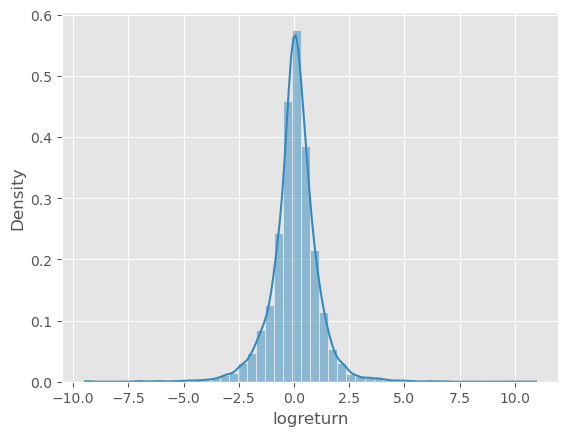

In [10]:
# Notice that the values are not the same as the previous plot because of the normalisation under stat="density".
sns.histplot(data=sp500['logreturn'], bins=50, stat="density", kde=True)

Next, we try to plot a $N(\mu,\sigma)$ pdf on top of the fitted kernel density estimator. The $\mu$ and $\sigma$ are estimated from the sample mean and standard deviation of the daily log returns.

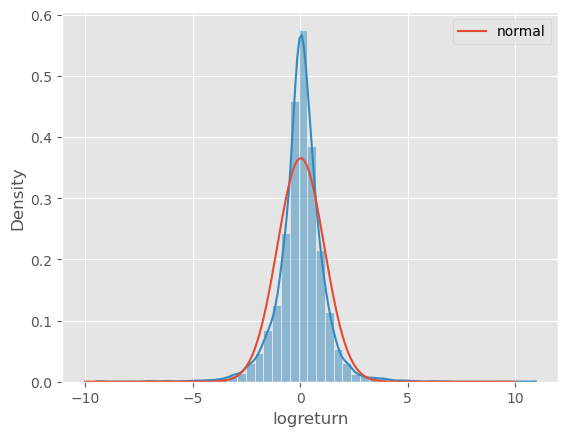

In [11]:
from scipy.stats import norm # import the "norm" function from the Scipy.stats library as we will need the normal pdf function

mu = sp500['logreturn'].mean()
sigma = sp500['logreturn'].std()

x = np.linspace(-10,10,1000)

# Add the plot of N(\mu,\sigma) pdf on top of the seaborn histogram
sns_ax = sns.histplot(data=sp500['logreturn'], bins=50, stat="density", kde=True)
sns_ax.plot(x,norm.pdf(x,mu,sigma),label="normal")
plt.legend()

The fitted kernel estimator has a more acute peak and heavier tails relative to the normal pdf.

## QQplots

QQplots can also be produced easily by the function "qqplot" from the statsmodels package. See https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

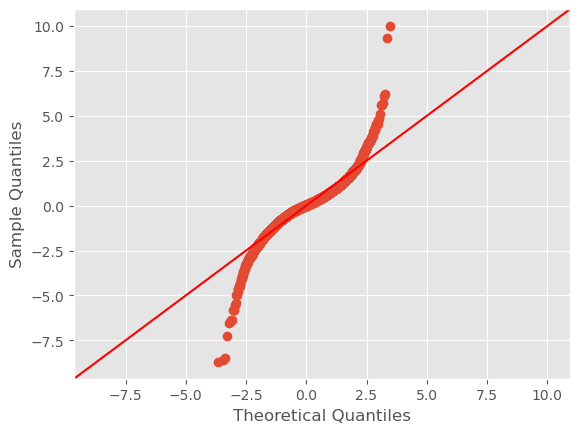

In [12]:
import statsmodels.api as sm

z = (sp500['logreturn'] - mu)/sigma  # remember to normalise the data against the mean and sd!

sm.qqplot(z, line='45')
plt.show()

Observe the large deviation of the sample (empirical) quantiles from the theoretical $N(0,1)$ quantiles, especially near the tails.

## Autocorrelation function (ACF)

The statsmodels package also provides a function to display ACF plot. See https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

Below is the ACF plot of the daily return $\rho(k)=Cor(r_t,r_{t-k})$ for $k=0,1,...,50$. The correlation values are very small (beyond $k=0$). This suggests forecasting daily returns based on historical values tends to be hard because of the lack of (linear) dependence.

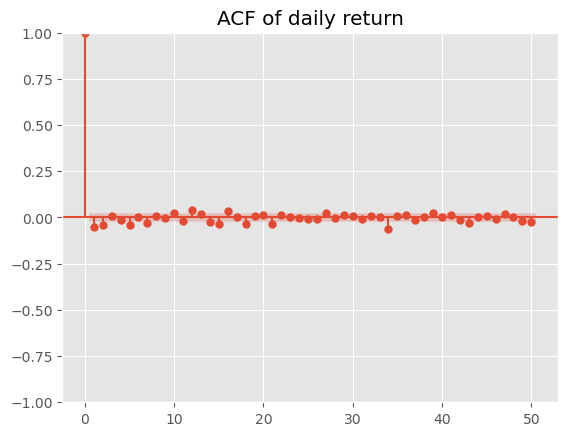

In [13]:
sm.graphics.tsa.plot_acf(sp500['logreturn'].dropna(), lags=50, title="ACF of daily return")
plt.show()

But if we plot the instead the ACF of the absolute daily return $\rho(k)=Cor(|r_t|,|r_{t-k}|)$, the values are now much more significant. This indicates the phenomenon of volatility clustering: a large move today tends to result in another large move in the near future (although we are not certain about the direction of move).

The effect is also very persistent over time where $\rho(k)$ remains significant for large value of $k$: the impact of a large move today can influence the move many days beyond.

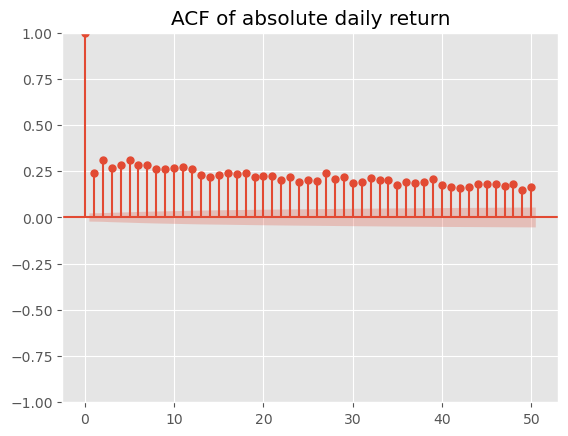

In [14]:
sm.graphics.tsa.plot_acf(np.abs(sp500['logreturn']).dropna(), lags=50, title="ACF of absolute daily return")
plt.show()

## Important Packages:

1.    Numpy  (array manipulation)
2.    Pandas (Dataframe management)
3.    Scipy  (Scientific computing, optimization solvers, etc)
4.    Matplotlib/Plotly/Seaborn (plotting)
5.    Statsmodels (Linear regression, etc)